# Случайные процессы. Прикладной поток.
## Семинар 6

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## Простой однородный пуассоновский процесс

**Задача:** Сгенерировать пуассоновский процесс на отрезке $[0, T]$.

#### Вариант 1

Генерируется экспоненциальные случайные величины до тех пор, пока сумма не станет равна $T$.

In [2]:
T = 20
l = 1  # интенсивность

S = 0
xi = [0]  # тут будут случайные величины \xi_i. Ноль для удобства
while S < T:
    xi.append(sps.expon(scale=1/l).rvs())
    S += xi[-1]
jumps = np.cumsum(xi)  # моменты скачков

График траектории пуассоновского процесса на $[0, T]$.

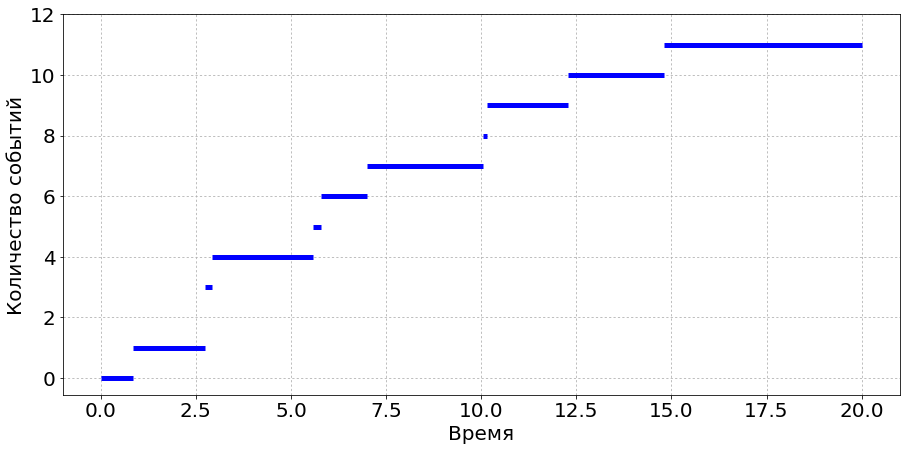

In [3]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps) - 1):
    plt.hlines(i, jumps[i], min(jumps[i+1], T), lw=5, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, len(xi), 2), fontsize=20), plt.ylabel('Количество событий', fontsize=20)
plt.show()

Тот же график с вертикальными линиями в моменты времени, когда происходят события.

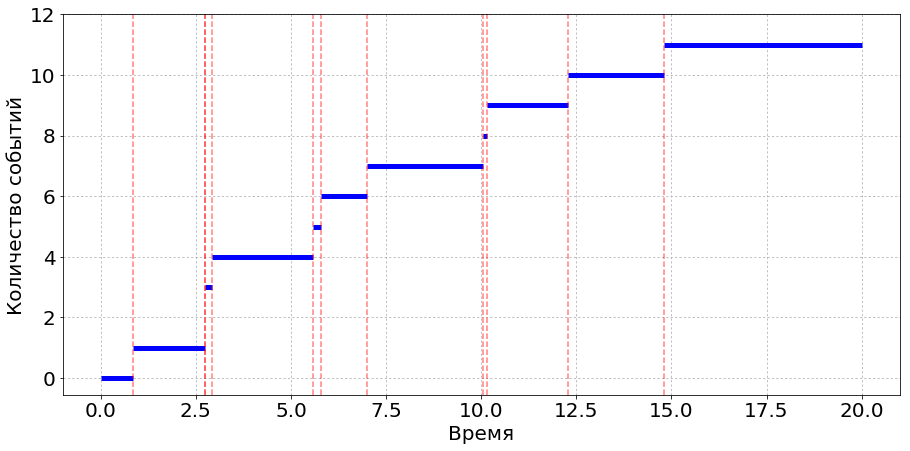

In [4]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps) - 1):
    plt.hlines(i, jumps[i], min(jumps[i+1], T), lw=5, color='blue')
    if i != len(jumps) - 2:
        plt.axvline(jumps[i+1], ls='--', color='red', alpha=0.5)
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, len(xi), 2), fontsize=20), plt.ylabel('Количество событий', fontsize=20)
plt.show()

#### Вариант 2

Генерируется случайная величина $N_T \sim Pois(\lambda T)$. Теперь условное распределение моментов скачков $Y_1, ..., Y_n$ при условии $N_T = n$ совпадает с распределением вариационного ряда для выборки размера $n$ из $R[0, T]$. То есть нужно только сгенерировать выборку из равномерного распределения.

In [20]:
T = 20
l = 1  # интенсивность

N_T = sps.poisson(mu=l*T).rvs()
jumps = sps.uniform(loc=0, scale=T).rvs(size=N_T)  # моменты скачков (не упоряд.)
jumps.sort()

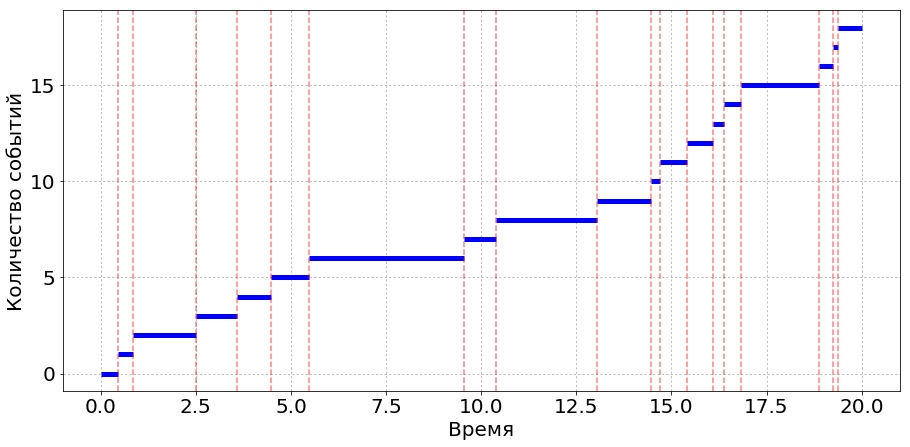

In [21]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps)):
    plt.hlines(i, jumps[i-1] if i>0 else 0, jumps[i], lw=5, color='blue')
    plt.axvline(jumps[i], ls='--', color='red', alpha=0.5)
plt.hlines(len(jumps), jumps[-1], T, lw=5, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, len(jumps), 5), fontsize=20), plt.ylabel('Количество событий', fontsize=20)
plt.show()

## Составной однородный пуассоновский процесс

*Определение.* Пусть $(N_t, t\geqslant0)$ --- однородный пуассоновский процесс, а $\{\xi_i\}$ --- независимые одинаково рвспределенные случайные величины, независящие так же от процесса $N_t$. Тогда процесс $$X_t = \sum\limits_{i=1}^{N_t} \xi_i$$ называется составным пуассоновским процессом.

*Пример.* Пусть событие --- совершение заказа в интернет-магазине, а $\xi_i$ --- сумма $i$-го заказа. Тогда $X_t$ --- прибыль к моменту времени $t$.

Пусть $\xi_i \sim Gamma(1, 10)$ --- стоимость покупки

In [22]:
T = 20
l = 1

N_T = sps.poisson(mu=l*T).rvs()
jumps = sps.uniform(loc=0, scale=T).rvs(size=N_T)
jumps.sort()

costs = sps.gamma(a=10, scale=1).rvs(size=N_T)  # стоимость покупок
balance = np.append(0, costs).cumsum()

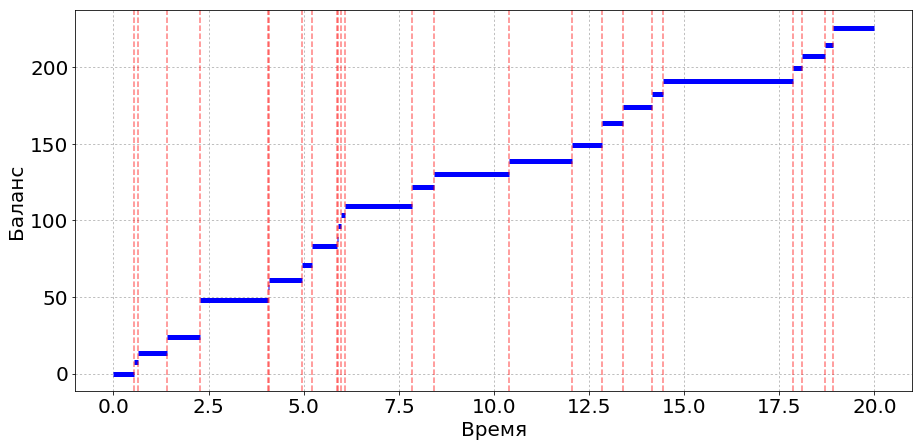

In [23]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps)):
    plt.hlines(balance[i], jumps[i-1] if i>0 else 0, jumps[i], lw=5, color='blue')
    plt.axvline(jumps[i], ls='--', color='red', alpha=0.5)
plt.hlines(balance[-1], jumps[-1], T, lw=5, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, int(max(balance)), 50), fontsize=20), plt.ylabel('Баланс', fontsize=20)
plt.show()

Пусть $\xi_i \sim Cauchy$ --- стоимость покупки

In [24]:
T = 20
l = 1

N_T = sps.poisson(mu=l*T).rvs()
jumps = sps.uniform(loc=0, scale=T).rvs(size=N_T)
jumps.sort()

costs = np.abs(sps.cauchy.rvs(size=N_T))
balance = np.append(0, costs).cumsum()

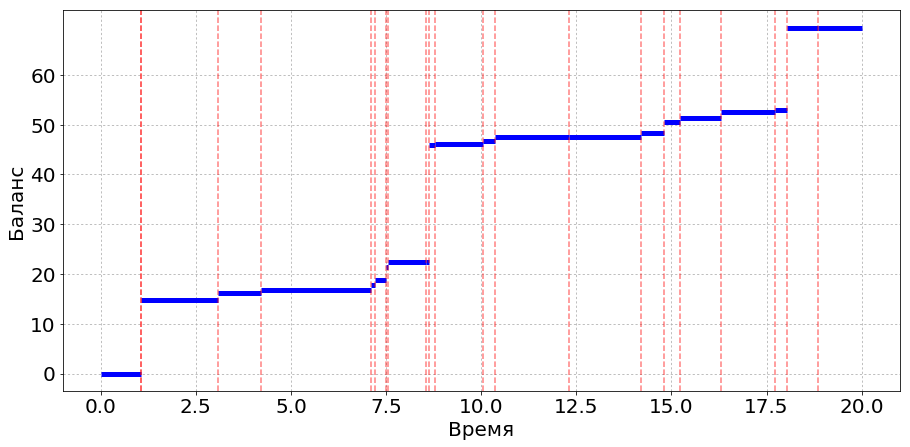

In [26]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps)):
    plt.hlines(balance[i], jumps[i-1] if i>0 else 0, jumps[i], lw=5, color='blue')
    plt.axvline(jumps[i], ls='--', color='red', alpha=0.5)
plt.hlines(balance[-1], jumps[-1], T, lw=5, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, int(max(balance)), 10), fontsize=20), plt.ylabel('Баланс', fontsize=20)
plt.show()

## Неоднородный пуассоновский процесс

Пусть $\lambda(t) = 5 \sin(\pi t/12 + 10) + 7.5$ --- интенсивность пуассоновского процесса, где $t$ --- время суток.

**Задача:** Сгенерировать неоднородный пуассоновский процесс с функцией интенсивности $\lambda(t)$ за трое суток.

#### Вариант 1

Посчитаем интеграл от функции интенсивности.

$$\Lambda(t) = \int\limits_0^t \lambda(s) ds = 3t + \frac{24}{\pi} \left(\cos(10) - cos(\pi t/12 + 10)\right)$$

Пусть $X_t$ --- однородный пуассновский процесс с интенсивностью 1, который является процессом восстановления, построенным по случайным величинам $\xi_n \sim Exp(1)$. Тогда $N_t = X_{\Lambda(t)}$ --- неоднородный пуассоновский процесс с функцией интенсивности $\lambda(t)$.

Пусть $\tau_n$ --- момент $n$-го скачка для $N_t$. Тогда $\Lambda(\tau_{n+1}) = \Lambda(\tau_n) + \xi_{n+1}$, поэтому $\tau_{n+1} = \Lambda^{-1}(\Lambda(\tau_n) + \xi_{n+1})$. Используем вариант 1 генерации однородного пуассоновского процесса с поправкой.

Обратную функцию будем считать численно. Пусть $grid$ --- сетка моментов времени, а $L\_grid$ --- значения функции $\Lambda$ в эти моменты времени. Тогда если в качестве аргумента у функции $\Lambda^{-1}$ взять значения из $L\_grid$, то получатся значения из $grid$.

In [27]:
T = 72
N = 1000  # мелкость построения функции

t = np.linspace(0, T+1, (T+1) * N + 1)  # сетка
L = 2 * (1.5*t + (12/np.pi) * (np.cos(10) - np.cos(10 + np.pi * t / 12)))
l = 5 * (np.sin(t * np.pi/12 + 10) + 1.5)

jumps = [0]
while jumps[-1] < T:
    index_L = int(round(jumps[-1] * N, 0))
    value = L[index_L] + sps.expon(scale=1).rvs()
    
    # берем обратную функцию
    index_t = np.searchsorted(L, value)
    jumps.append(t[index_t])

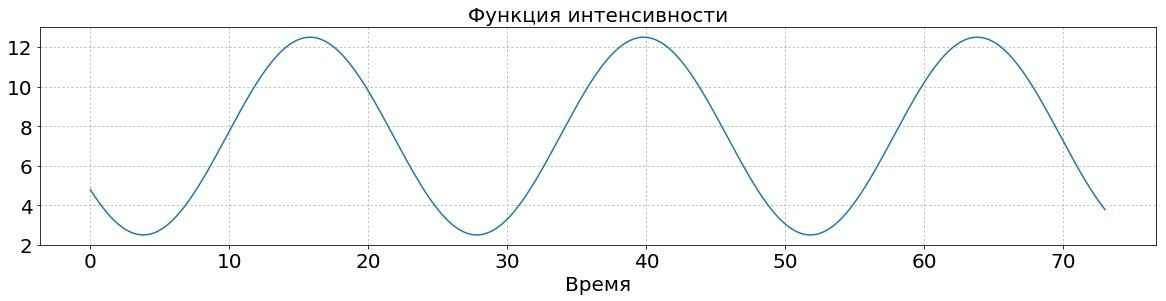

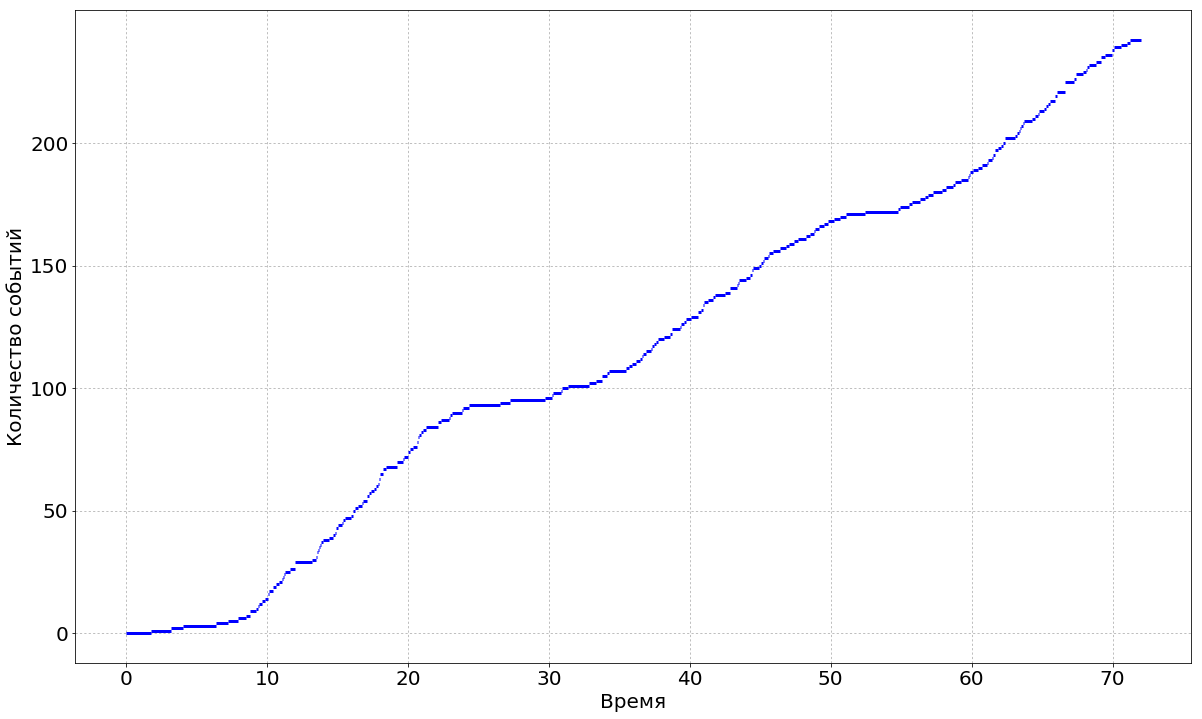

In [29]:
plt.figure(figsize=(20, 4))
plt.plot(t, l)
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(fontsize=20)
plt.title('Функция интенсивности', fontsize=20)
plt.show()

plt.figure(figsize=(20, 12))
for i in range(len(jumps) - 1):
    plt.hlines(i, jumps[i], min(jumps[i+1], T), lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, len(jumps), 50), fontsize=20), plt.ylabel('Количество событий', fontsize=20)
plt.show()

Пусть $\xi_i \sim Gamma(0.1, 4)$ --- стоимость покупки

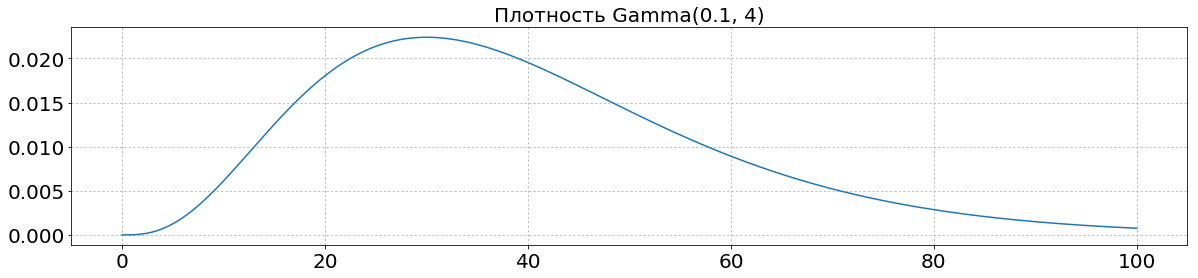

In [31]:
x = np.linspace(0, 100, 10000)
plt.figure(figsize=(20, 4))
plt.plot(x, sps.gamma(a=4, scale=10).pdf(x))
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.yticks(fontsize=20)
plt.title('Плотность Gamma(0.1, 4)', fontsize=20)
plt.show()

In [33]:
T = 72
N = 1000  # мелкость построения функции

t = np.linspace(0, T+1, (T+1) * N + 1)
L = 2 * (1.5*t + (12/np.pi) * (np.cos(10) - np.cos(10 + np.pi * t / 12)))
l = 5 * (np.sin(t * np.pi/12 + 10) + 1.5)

jumps = [0]
costs = []
while jumps[-1] < T:
    index_L = int(round(jumps[-1] * N, 0))
    value = L[index_L] + sps.expon(scale=1).rvs()
    
    index_t = np.searchsorted(L, value)
    jumps.append(t[index_t])
    
costs = sps.gamma(a=4, scale=10).rvs(size=len(jumps))
balance = np.append(0, costs).cumsum()

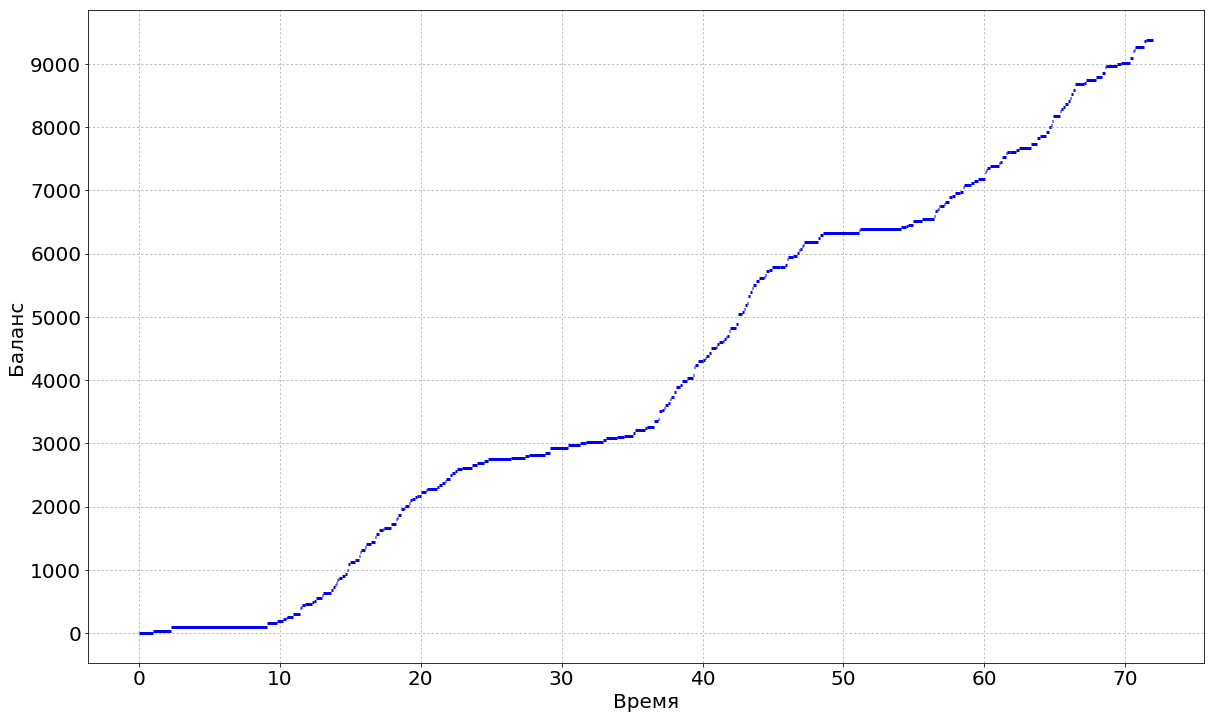

In [36]:
plt.figure(figsize=(20, 12))
for i in range(len(jumps) - 1):
    plt.hlines(balance[i], jumps[i], min(jumps[i+1], T), lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, int(max(balance)), 1000), fontsize=20), plt.ylabel('Баланс', fontsize=20)
plt.show()

#### Вариант 2

Пусть $\lambda = \max\limits_{t\in[0, T]} \lambda(t)$, где $\lambda(t)$ --- функция интенсивности. Тогда событие, появляющееся в момент времени $t$ "засчитывается" с некоторой вероятностью $p(t) = \lambda(t) / \lambda$. Иными словами, $N_t = N_{t-0} + 1$ с вероятностью $p(t)$ и $N_t = N_{t-0}$ с вероятностью $1 - p(t)$.

In [38]:
T = 72  # трое суток
l = 5 * 2.5  # максимальное значение интенсивности

S = 0
xi = [0]
while S < T:
    value = sps.expon(scale=1/l).rvs()
    if sps.uniform.rvs() < 5 * (np.sin(S * np.pi/12 + 10) + 1.5) / l:
        xi.append(value)
    else:
        xi[-1] += value
    S += value
jumps = np.cumsum(xi)
jumps[0] = 0

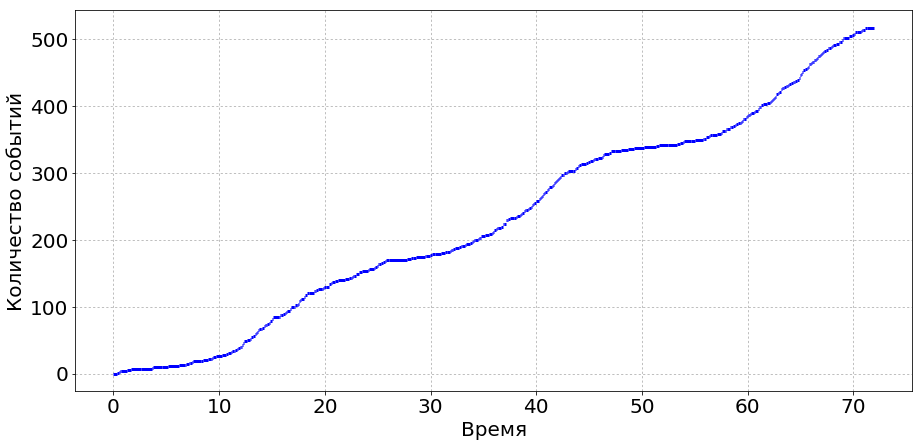

In [39]:
plt.figure(figsize=(15, 7))
for i in range(len(jumps) - 1):
    plt.hlines(i, jumps[i], min(jumps[i+1], T), lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(fontsize=20), plt.ylabel('Количество событий', fontsize=20)
plt.show()

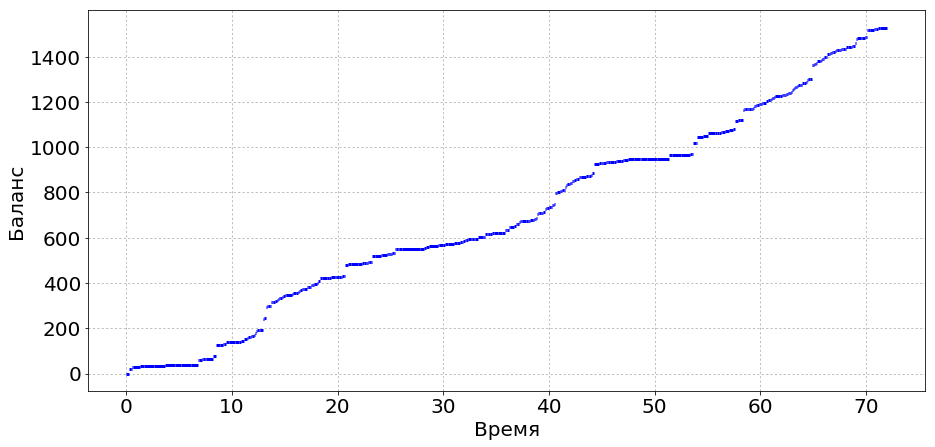

In [43]:
plt.figure(figsize=(15, 7))
cost = 0
for i in range(len(jumps) - 1):
    plt.hlines(cost, jumps[i], min(jumps[i+1], T), lw=3, color='blue')
    cost += min(np.abs(sps.cauchy.rvs()), 50)  # стоимость новой покупки
plt.grid(ls=':')
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.xticks(fontsize=20), plt.xlabel('Время', fontsize=20)
plt.yticks(range(0, int(cost), 200), fontsize=20), plt.ylabel('Баланс', fontsize=20)
plt.show()